# Foundations of Data Science
## Homework 3

Student Name: Xiaoxuan Liu

Student Netid: xl2590
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `Cell2Cell_data.csv` (you can find this in the data folder).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [3]:
#Place your code here
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
dataframe = pd.read_csv("data/Cell2Cell_data.csv")
# geting the random index from dataframe 
train_df_value = np.random.choice(a = len(dataframe),size = int(len(dataframe)*0.8), replace = False)
#train_df should contain the index from random choice
train_df = dataframe.loc[train_df_value]
test_df = dataframe.drop(train_df_value)

print("the length of datafram:",len(dataframe))
print(train_df.shape[0])
print(test_df.shape[0])
print("number of features:",dataframe.shape[1])

('the length of datafram:', 39859)
31887
7972
('number of features:', 12)


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<p>
<span style="color:blue">
The best way for us to prove is: we can compute the selection bias in both training dataset and the while dataset before we seprate. And the bias of those two dataset should be the same in some range which can means our training data can show us the distribut which is the same with the dataset. And the bias here is the way shows us the data distribution. 
</span>
</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [163]:
#Place your code here
mode = DecisionTreeClassifier(criterion='entropy')
mode = mode.fit(train_df.drop("churndep",1),train_df.churndep)
print(mode)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

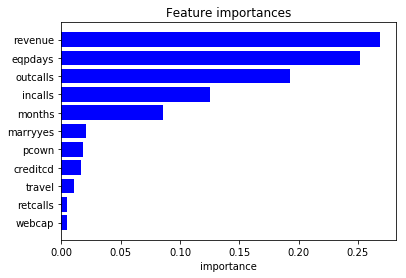

In [164]:
#Place your code here
%matplotlib inline
features_name = ['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls','churndep']
importances = mode.feature_importances_
indices = np.argsort(importances)
plt.figure()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_name[i] for i in indices])
plt.xlabel('importance')
plt.title('Feature importances')
plt.show()


5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [165]:
#Place your code here 
# the relation between revenue and eqpdays
print(dataframe["revenue"].corr(dataframe["eqpdays"]))
# the relation between revenue and outcalls
print(dataframe["revenue"].corr(dataframe["outcalls"]))
# the relation between eqpdays and outcalls
print(dataframe["eqpdays"].corr(dataframe["outcalls"]))

-0.22195803599734246
0.5008703731782664
-0.2439992519581283


<p>
<span style="color:blue">
The most three important features are: revenue, eqpdays and outcalls. The relation between revenue and eqpdays is negative, the relation between revenue and outcalls is positive and the relation between eqpdays and outcalls is negative. The relationship with the revenue and eqpment mean that as number of days the customer has had his/her current equipment increases, the mean monthly revenue decreases. If their revenue is high then their outcalls will be higher because the relationship is positive. And if the eqpdays is high then the outcalls will lower. And in real life, customers who have their current equipment for a longer period of time are more likely to churn.
</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [166]:
#Place your code here
train_predict = mode.predict(train_df.drop("churndep",1))
train_accuracy = metrics.accuracy_score(train_predict, train_df["churndep"])
print(" the accuracy of the training set is :" + str(train_accuracy))
test_predict = mode.predict(test_df.drop("churndep",1))
test_accuracy = metrics.accuracy_score(test_predict, test_df["churndep"])
print(" the accuracy of the testing set is :" + str(test_accuracy))


 the accuracy of the training set is :0.9998745570295104
 the accuracy of the testing set is :0.5254641244355244


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [167]:
#Place your code here
#min_samples_split specifies the minimum number of samples required to split an internal node, 
#min_samples_leaf specifies the minimum number of samples required to be at a leaf node.
min_samples_split =  np.arange(300,1300,100)
print (min_samples_split)
min_samples_leaf = np.arange(100,600,50)
print(min_samples_leaf)

[ 300  400  500  600  700  800  900 1000 1100 1200]
[100 150 200 250 300 350 400 450 500 550]


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
There are total 39859 data, and 31887 train dataset, the min_sample_split should in around of 1 to 4 percent of the training data which is 800 data, so choose the range from 300 to 1300, considering the next question the space should be 100. It defines the samples number in each node.min_samples_leaf specifies the minimum number of the leaf node, which should not be too high, so I choose the range of 0.5 to 2 percent in the training set. In that range will not underfitting(too low) or overfitting(too high).
</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

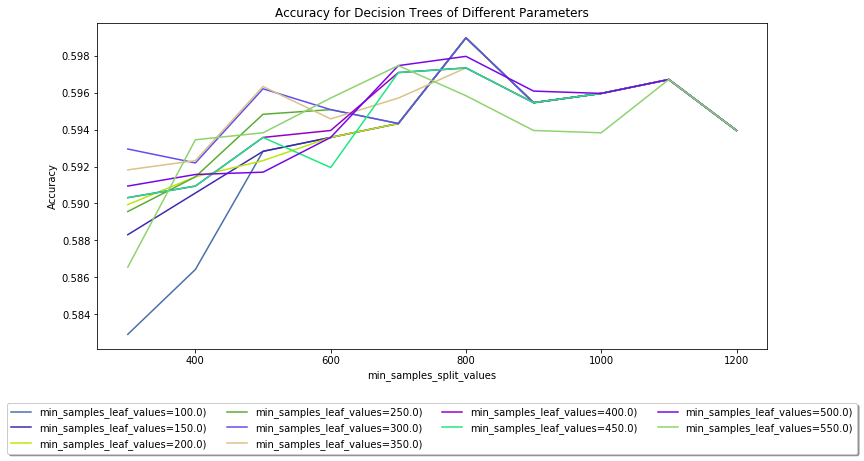

Sample Split Size is 1200 and Leaf Samples are 300. Best accuracy is 59.75%


In [168]:
def train_accuracy(train_features,train_target,test_features,test_target,samplesplit,sampleleaf):
    model=DecisionTreeClassifier(criterion="entropy",min_samples_split=samplesplit,min_samples_leaf=sampleleaf)
    model=model.fit(train_features,train_target)
    test_predict=model.predict(test_features)
    return metrics.accuracy_score(test_predict,test_target)

result_dict=dict()
for values in min_samples_split:
    result_dict[values]=list()

for values in min_samples_split:
    for nodes in min_samples_leaf:
        result_dict[values].append([train_accuracy(train_df.drop("churndep",1),train_df.churndep,test_df.drop("churndep",1),test_df.churndep,values,nodes)])

#print(result_dict[min_samples_split[0]])
#print(min_samples_split)
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)
for i,values in enumerate(min_samples_split):
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(min_samples_split,result_dict[values],color = c,label='min_samples_leaf_values=%0.1f)'%min_samples_leaf[i])
    plt.xlabel('min_samples_split_values')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Decision Trees of Different Parameters')
    plt.legend(loc="lower right")

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, shadow = True, ncol = 4, prop = {'size':10})
plt.show()

    
max_split=max(result_dict, key=lambda x: result_dict[x][1])
max_accuracy=max(result_dict[max_split])
max_leaf=min_samples_leaf[list(result_dict[max_split]).index(max_accuracy)]
print("Sample Split Size is %d and Leaf Samples are %d. Best accuracy is %.2f%%" %(max_split,max_leaf,max_accuracy[0]*100))



[ 10 110 210 310 410 510 610 710 810 910]
[ 10 110 210 310 410 510 610 710 810 910]


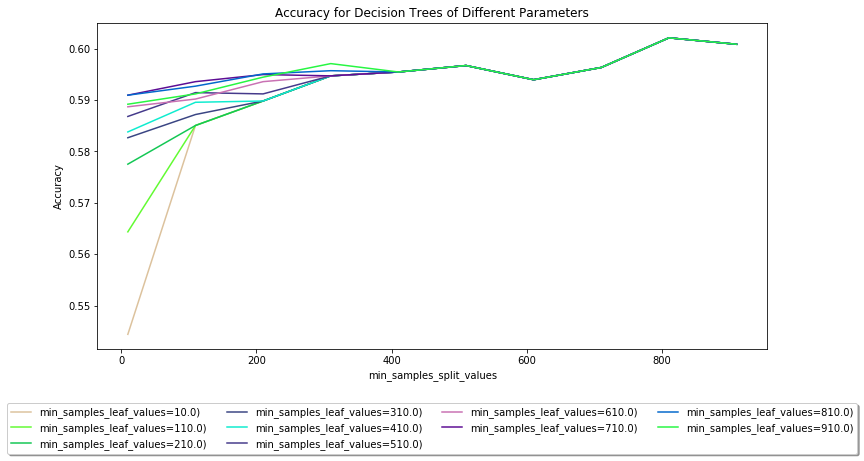

Sample Split Size is 710 and Leaf Samples are 810. Best accuracy is 60.21%


In [173]:
min_samples_split =  np.arange(10,1000,100)
print (min_samples_split)
min_samples_leaf = np.arange(10,1000,100)
print(min_samples_leaf)
result_dict=dict()
for values in min_samples_split:
    result_dict[values]=list()

for values in min_samples_split:
    for nodes in min_samples_leaf:
        result_dict[values].append([train_accuracy(train_df.drop("churndep",1),train_df.churndep,test_df.drop("churndep",1),test_df.churndep,values,nodes)])

#print(result_dict[min_samples_split[0]])
#print(min_samples_split)
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)
for i,values in enumerate(min_samples_split):
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(min_samples_split,result_dict[values],color = c,label='min_samples_leaf_values=%0.1f)'%min_samples_leaf[i])
    plt.xlabel('min_samples_split_values')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Decision Trees of Different Parameters')
    plt.legend(loc="lower right")

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, shadow = True, ncol = 4, prop = {'size':10})
plt.show()

    
    
max_split=max(result_dict, key=lambda x: result_dict[x][1])
max_accuracy=max(result_dict[max_split])
max_leaf=min_samples_leaf[list(result_dict[max_split]).index(max_accuracy)]
print("Sample Split Size is %d and Leaf Samples are %d. Best accuracy is %.2f%%" %(max_split,max_leaf,max_accuracy[0]*100))




4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
Sample Split Size is 710 and Leaf Samples are 810. Best accuracy is 60.21%
</span>
</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
In real life, we can use this churn production model to predict the people who will be more likely to churen.Also, we can focus on the features that will infulence the customer churn and to public some police focusing on that.When we predict some people will churn, we can give them some discount or some promotion campaign which can save the customers. 
</span>
</p>

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file `cases.csv` is available in the data folder.



1\. Load the cases data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [72]:
#Place your code here
from pandas import datetime
import scipy 
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import pandas as pd
dataframe = pd.read_csv("data/cases.csv")

dataframe["YEAR"] = pd.to_datetime(dataframe["YEAR"], format = "%Y")
print(dataframe)

                   YEAR  YFCASES
0   1700-01-01 00:00:00      5.0
1   1701-01-01 00:00:00     11.0
2   1702-01-01 00:00:00     16.0
3   1703-01-01 00:00:00     23.0
4   1704-01-01 00:00:00     36.0
5   1705-01-01 00:00:00     58.0
6   1706-01-01 00:00:00     29.0
7   1707-01-01 00:00:00     20.0
8   1708-01-01 00:00:00     10.0
9   1709-01-01 00:00:00      8.0
10  1710-01-01 00:00:00      3.0
11  1711-01-01 00:00:00      0.0
12  1712-01-01 00:00:00      0.0
13  1713-01-01 00:00:00      2.0
14  1714-01-01 00:00:00     11.0
15  1715-01-01 00:00:00     27.0
16  1716-01-01 00:00:00     47.0
17  1717-01-01 00:00:00     63.0
18  1718-01-01 00:00:00     60.0
19  1719-01-01 00:00:00     39.0
20  1720-01-01 00:00:00     28.0
21  1721-01-01 00:00:00     26.0
22  1722-01-01 00:00:00     22.0
23  1723-01-01 00:00:00     11.0
24  1724-01-01 00:00:00     21.0
25  1725-01-01 00:00:00     40.0
26  1726-01-01 00:00:00     78.0
27  1727-01-01 00:00:00    122.0
28  1728-01-01 00:00:00    103.0
29  1729-0

2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

c:\python27\lib\site-packages\matplotlib\pyplot.py:969: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


<Figure size 432x288 with 0 Axes>

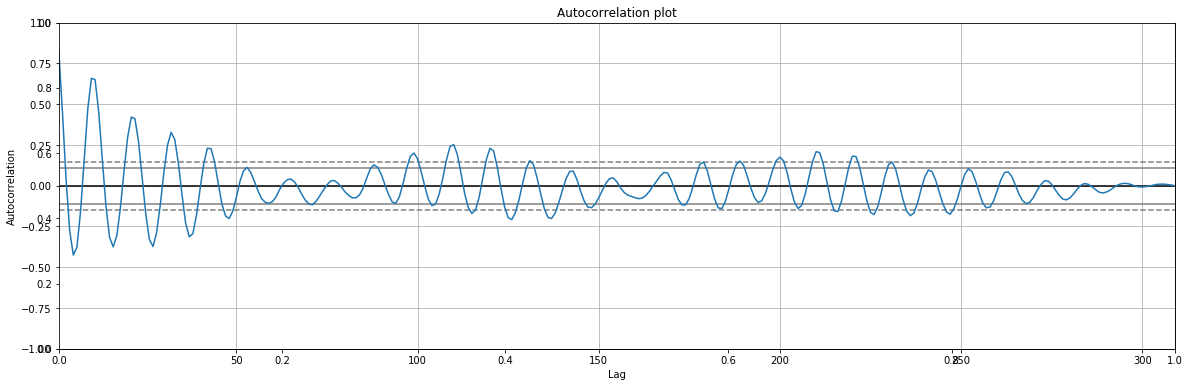

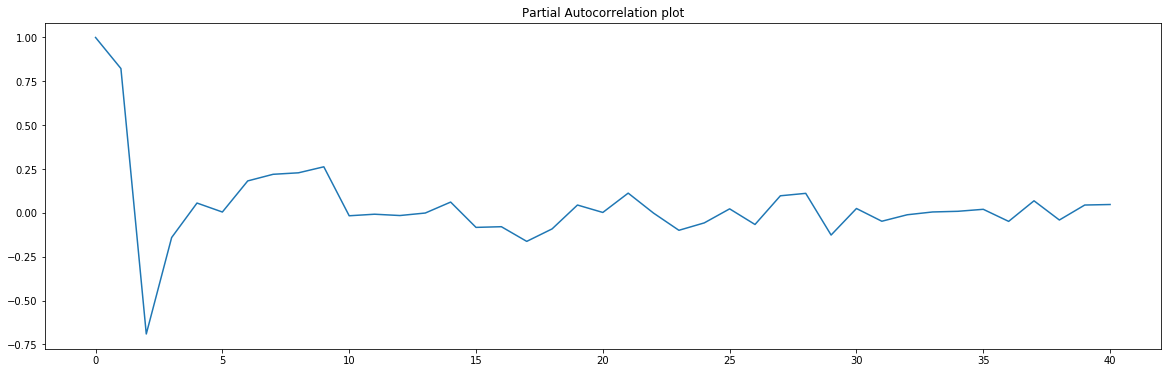

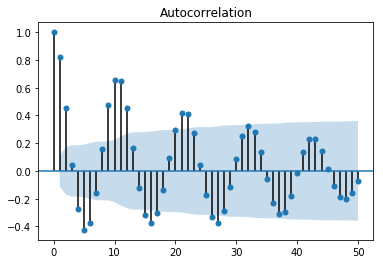

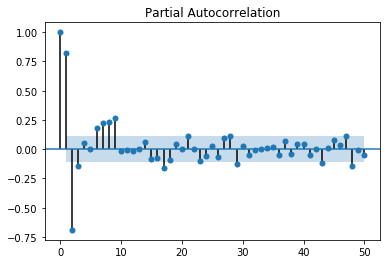

In [29]:
#Place your code here
#Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting.

#These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. 
#The difference between autocorrelation and partial autocorrelation can be difficult and confusing for beginners to time series forecasting.
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import pacf,acf
from matplotlib import pyplot
plt.figure(1)
plt.figure(figsize=(20,6))
plt.title("Autocorrelation plot")
autocorrelation_plot(dataframe["YFCASES"])
plt.figure(2)
plt.figure(figsize=(20,6))
plt.title("Partial Autocorrelation plot")
plt.plot(pacf(dataframe["YFCASES"]))

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(dataframe["YFCASES"] , lags=50)
pyplot.show()


plot_pacf(dataframe["YFCASES"], lags=50)
pyplot.show()

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<p>
<span style="color:blue">
The plot meet the second rule: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. 
</span>
</p>

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [68]:
#Place your code here
from statsmodels.stats.stattools import durbin_watson
print(statsmodels.stats.stattools.durbin_watson(dataframe["YFCASES"], axis=0))


0.13952892659903304


5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


c:\python27\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


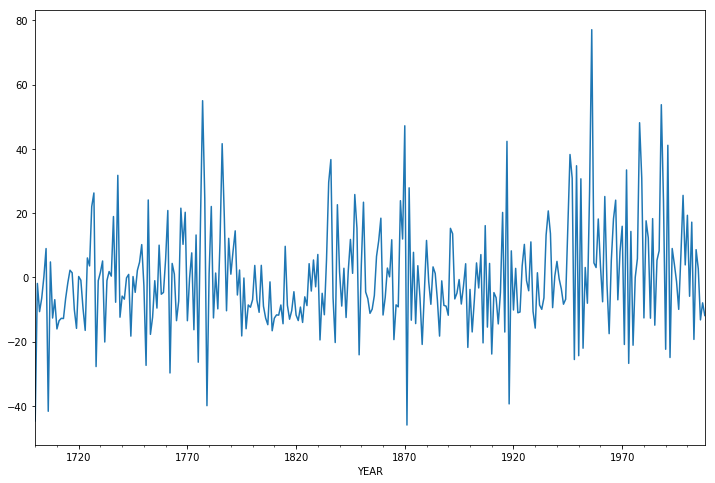

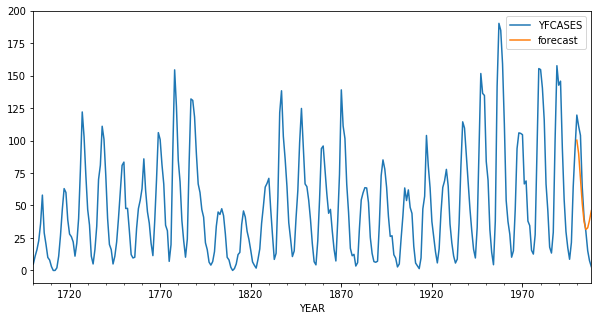

In [64]:
from statsmodels import tsa
import statsmodels.api as sm  


indexedFever=dataframe.set_index("YEAR")
cases=indexedFever.astype(float)
arma_result = sm.tsa.ARMA(cases,(2,0)).fit()
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
ax = arma_result.resid.plot(ax = ax )

cases['forecast'] = arma_result.predict(start = 300 , end= 360, dynamic= True)  
cases[['YFCASES', 'forecast']].plot(figsize=(10, 5))
plt.show()

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



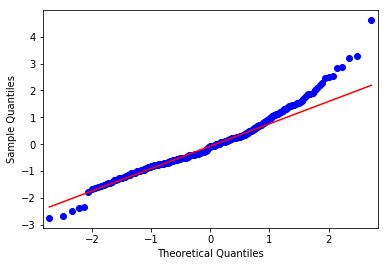

In [67]:
#Place your code here
from statsmodels.graphics.api import qqplot
import scipy.stats as stats
resid = arma_result.resid
stats.normaltest(resid)
fig = plt.figure()
ax = fig.add_subplot(111)
fig = qqplot(resid, line = "q", ax = ax, fit = True)

<p>
<span style="color:blue">
The aligns from the range of -2 to 1.
</span>
</p>


7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


c:\python27\lib\site-packages\matplotlib\pyplot.py:969: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


<Figure size 432x288 with 0 Axes>

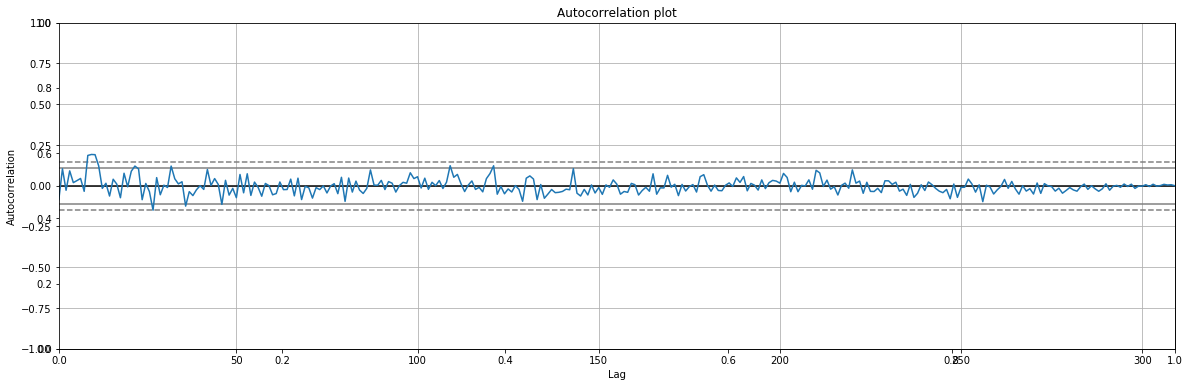

(array([ 1.00000000e+00, -8.52201437e-02,  1.03691498e-01, -2.78328578e-02,
         9.11225082e-02,  1.90096315e-02,  3.13205282e-02,  4.44846003e-02,
        -3.43373222e-02,  1.85689576e-01,  1.91607611e-01,  1.90384967e-01,
         1.21692874e-01, -1.62188143e-02,  1.49863479e-02, -6.31966300e-02,
         3.97300619e-02,  9.57662421e-03, -7.36448053e-02,  7.64692160e-02,
        -6.82679626e-03,  8.88181382e-02,  1.20484586e-01,  1.03328482e-01,
        -8.57282313e-02,  1.37300256e-02, -3.61829681e-02, -1.50155873e-01,
         4.96801661e-02, -5.54670876e-02,  3.35398808e-03, -1.09052800e-02,
         1.20385660e-01,  4.26796218e-02,  1.11070917e-02,  2.42613184e-02,
        -1.25046080e-01, -3.63935156e-02, -6.05085323e-02, -2.44395755e-02,
         5.81172609e-04]),
 array([ 2.26596228,  5.63159556,  5.87487928,  8.49107577,  8.60530906,
         8.91643369,  9.54613024,  9.9225611 , 20.96773764, 32.76749811,
        44.45624386, 49.24797805, 49.33337952, 49.40654201, 50.7119

In [70]:
#Place your code here
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import pacf,acf
from matplotlib import pyplot
plt.figure(1)
plt.figure(figsize=(20,6))
plt.title("Autocorrelation plot")
autocorrelation_plot(resid)
plt.show()
acf_value = acf(resid, qstat = True)
q_value = acf_value[1]
p_value = acf_value[2]
auto_value = acf_value[0]
acf_value

<p>
<span style="color:blue">
Place your response here
</span>
</p>

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)



In [75]:
#Place your code here

start_time = datetime(2009,1,1)
end_time = datetime(2012,1,1)
predict = arma_result.predict(start = start_time, end = end_time)
predict

2009-01-01    13.662915
2010-01-01    31.797852
2011-01-01    49.606272
2012-01-01    61.884458
Freq: AS-JAN, dtype: float64

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [77]:
#Place your code here
# The mean absolute error (MAE) value is computed as the average absolute error value. 
# If MAE is zero the forecast is perfect. 
# As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
start_time = datetime(1700,1,1)
end_time = datetime(2008,1,1)
predict = arma_result.predict(start = start_time, end = end_time)
MAE = mean_absolute_error(dataframe["YFCASES"],predict)
MFE = mean_squared_error(dataframe["YFCASES"], predict)
print(MAE)
print(MFE)

12.625232065678302
280.1283007067993
